In [1]:
from module.cleverhans_model_v2 import AttackModel, Attacker, CleverhansModel
from module.utils import * 
from cleverhans.attacks import FastGradientMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
batch_shape = (110, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

In [3]:
name = 'inception_v1'
A = Attacker(batch_shape, 110, name=name)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 33.62 s
inception_v1 predict runs: 18.34 s
inception_v1 predict accuracy : 0.06363636255264282
inception_v1 adv accuracy : 0.06363636255264282, L2 25.44385028931669


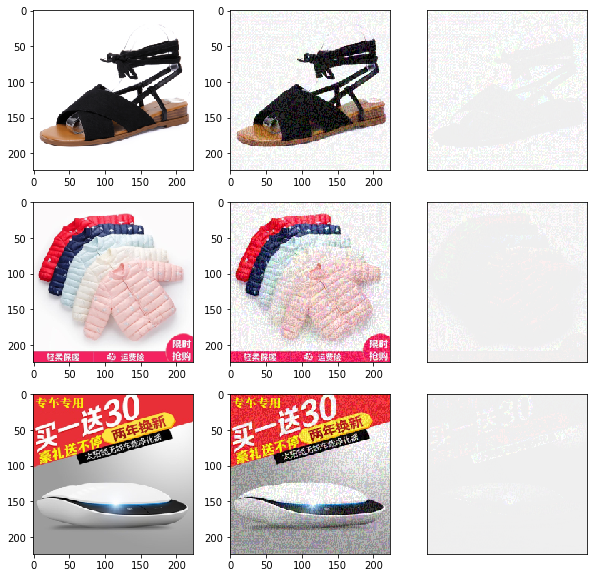

In [10]:
attack_params = {"eps":32.0 / 255.0,  "clip_min": None, "clip_max": None}
Xadv, _ = A.attack(X, Y, FastGradientMethod, attack_params, None)
plot_images(X, Xadv, n=3)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 399.00 s
inception_v1 predict runs: 13.63 s
inception_v1 predict accuracy : 0.9636363387107849
inception_v1 adv accuracy : 0.9636363387107849, L2 0.0446773539809331


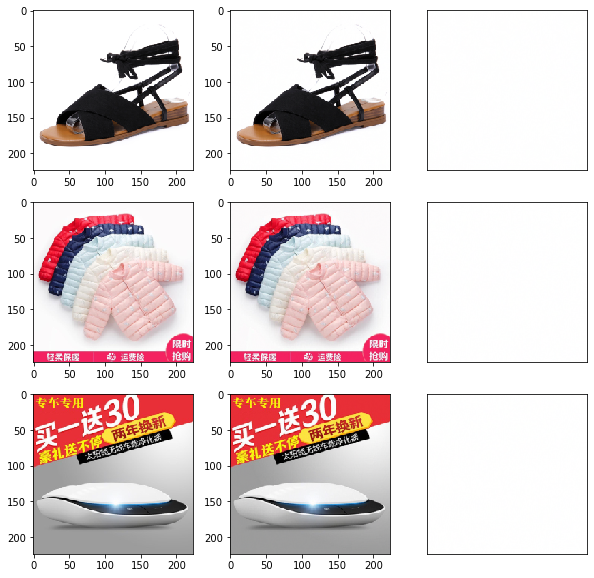

In [4]:
attack_params = {"eps": 32.0 / 255.0, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y, 'ord':2}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 389.38 s
inception_v1 predict runs: 13.91 s
inception_v1 predict accuracy : 0.0
inception_v1 adv accuracy : 0.0, L2 20.317433896425737


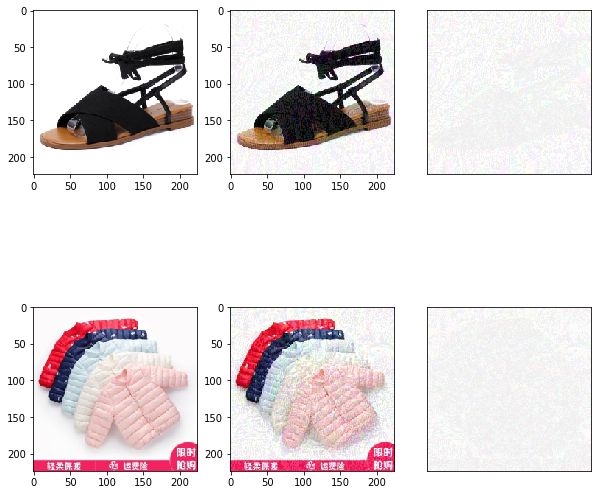

In [9]:
attack_params = {"eps": 32.0 / 255.0, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

In [3]:
name = 'resnetv1_50'
A = Attacker(batch_shape, 110, name=name)

{'eps': 25.5, 'clip_min': -115, 'clip_max': 140, 'ep_ratio': 0.1}
resnetv1_50 attack runs: 61.23 s
resnetv1_50 predict runs: 23.88 s
resnetv1_50 predict accuracy : 0.05454545468091965
resnetv1_50 adv accuracy : 0.05454545468091965, L2 39.49511897622951


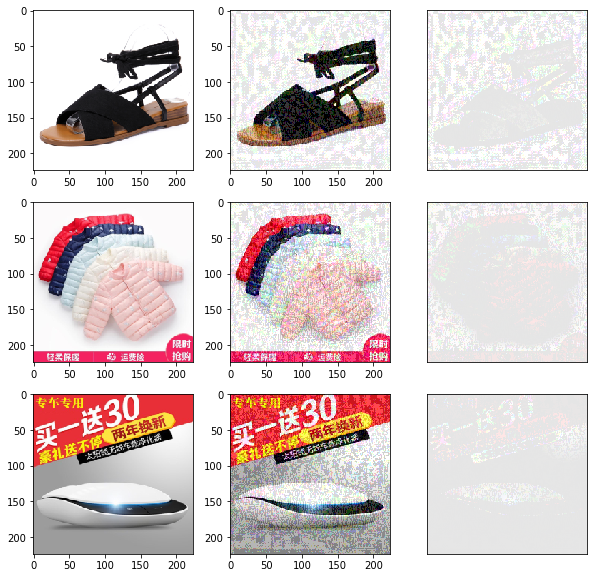

In [5]:
attack_params = {"eps":None,  "clip_min": None, "clip_max": None, "ep_ratio": 0.1}
Xadv, _ = A.attack(X, Y, FastGradientMethod, attack_params, 'vgg')
plot_images(X, Xadv, n=3)

{'ep_ratio': 0.1, 'eps_iter': 0.01, 'clip_min': -1.0, 'clip_max': 1.0, 'nb_iter': 20, 'decay_factor': 1.0, 'y': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'eps': 0.2}


C:\ProgramData\Miniconda3\lib\site-packages\cleverhans\attacks\__init__.py:886: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


resnetv1_50 attack runs: 972.59 s
resnetv1_50 predict runs: 27.65 s
resnetv1_50 predict accuracy : 0.19090908765792847
resnetv1_50 adv accuracy : 0.19090908765792847, L2 31.229842098835082


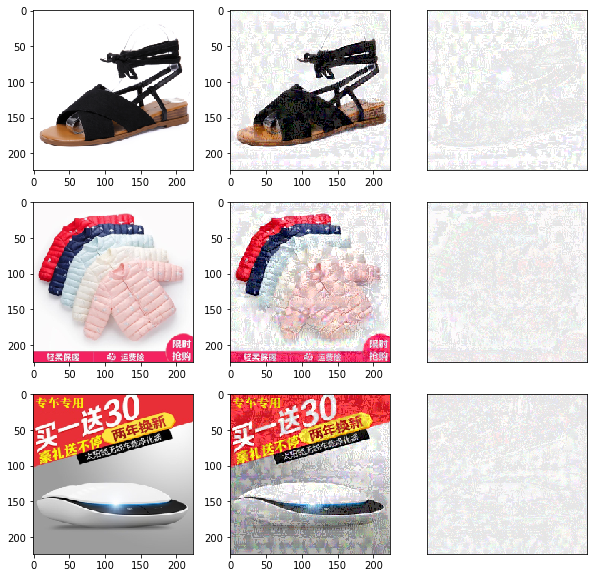

In [6]:
attack_params = {"ep_ratio":0.1, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, '(-1,1)')
plot_images(X, Xadv, n=3)

{'ep_ratio': 0.1, 'eps_iter': 2.55, 'clip_min': -115, 'clip_max': 140, 'nb_iter': 20, 'decay_factor': 1.0, 'y': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'eps': 25.5}


C:\ProgramData\Miniconda3\lib\site-packages\cleverhans\attacks\__init__.py:886: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 attack runs: 961.28 s
resnetv1_50 predict runs: 20.24 s
resnetv1_50 predict accuracy : 0.0
resnetv1_50 adv accuracy : 0.0, L2 32.3170880946547


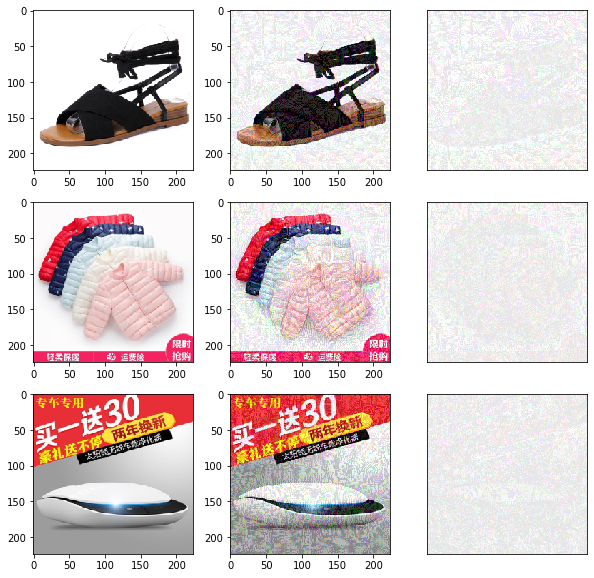

In [4]:
attack_params = {"ep_ratio":0.1, "eps_iter": 0.01, "clip_min": -1.0, "clip_max": 1.0, \
                             "nb_iter": 20, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, MomentumIterativeMethod, attack_params, 'vgg')
plot_images(X, Xadv, n=3)

In [6]:
#Trasfer to Inception V1
name = 'inception_v1'
TA = Attacker(batch_shape, 110, name=name)
TA.predict(Xadv, Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 12.53 s
inception_v1 predict accuracy : 0.26363635063171387


(array([ 70,  13,  30,  52,  57,  30,  58,  28,  90, 106,  15,  45,   1,
         78,  52,  91,  40,   1, 106,  86,  52, 101, 102, 105,  94,   7,
        104,  18,  33,  36,  33,  30, 108,  62,  97,   8, 101,  85,  40,
         85, 106,  14,  70,   1,  86, 109,  26,  94,  33,  33,  30,  92,
          1,  46,  92,  45,  42,  66,  83,   1,   6,  85,  97, 103,   2,
         85, 102,  45, 103,  56,  26,  96,   2,  92,  56,  30, 108, 102,
        108,  99,  86,  30, 106,  22,  85, 102,  30,   0, 102,  64,  42,
        102,  79,   8,  75,  36,  62,  79,  68,  23,  13,  90,  92,  50,
        105,  85,   2,  56, 102,  61], dtype=int64), 0.26363635)

In [7]:
#Trasfer to Vgg 16
name = 'vgg_16'
TA = Attacker(batch_shape, 110, name=name)
TA.predict(Xadv, Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
vgg_16 predict runs: 243.03 s
vgg_16 predict accuracy : 0.2818181812763214


(array([ 60, 102,  70,  52, 105,  75,  86,  75,   2,  31,  81,  45,   1,
         78,  52,  37,  30, 105, 108,  86,  52, 101, 102, 105,  94,  30,
          8,  18,  86,  93,   1,  30,  47, 102,  97,  28, 101,  86,  16,
         14,  59,   2,  70,   1,  33, 109,  20,  51,  86,  79,  59,  33,
         26,  33,  70,   9,  86,  67,  83,  20,  67,  90,  97,  65,   2,
         43,  57,  45, 103,  52,  26,  42,  86,  92,  56,  75,  79, 105,
          3,  99,  86,  30,  99,  22,  86, 102,  30,  24, 102,  64,  42,
        102,  79, 108,  49, 104,  85, 102,  68,  52, 102,   1,  37,  92,
         45,  86,   1, 101,  86,  40], dtype=int64), 0.28181818)

In [12]:
A.target_model.get_logits(A.x)

<tf.Tensor 'Squeeze_1:0' shape=(?, 110) dtype=float32>